# Testing belief

In [33]:
from models.single_policy import SinglePolicy
from single_agent import SingleAgent
from IPython.display import SVG, display, HTML
import torch
from torch import distributions
from vh_graph.envs import belief
import pdb
import vh_graph
import gym
import envdataset
import utils_viz
import utils
import sys
from IPython.display import Image
sys.argv = ['-f'] 

In [34]:
curr_env = gym.make('vh_graph-v0')

In [35]:
path_init_env = 'dataset_toy3/init_envs/TrimmedTestScene2_graph_11.json'
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
gt_state = curr_env.vh_state.to_dict()


In [36]:
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 2026
goal_str = 'findnode_{}'.format(id_goal)


### Visualize GT graph

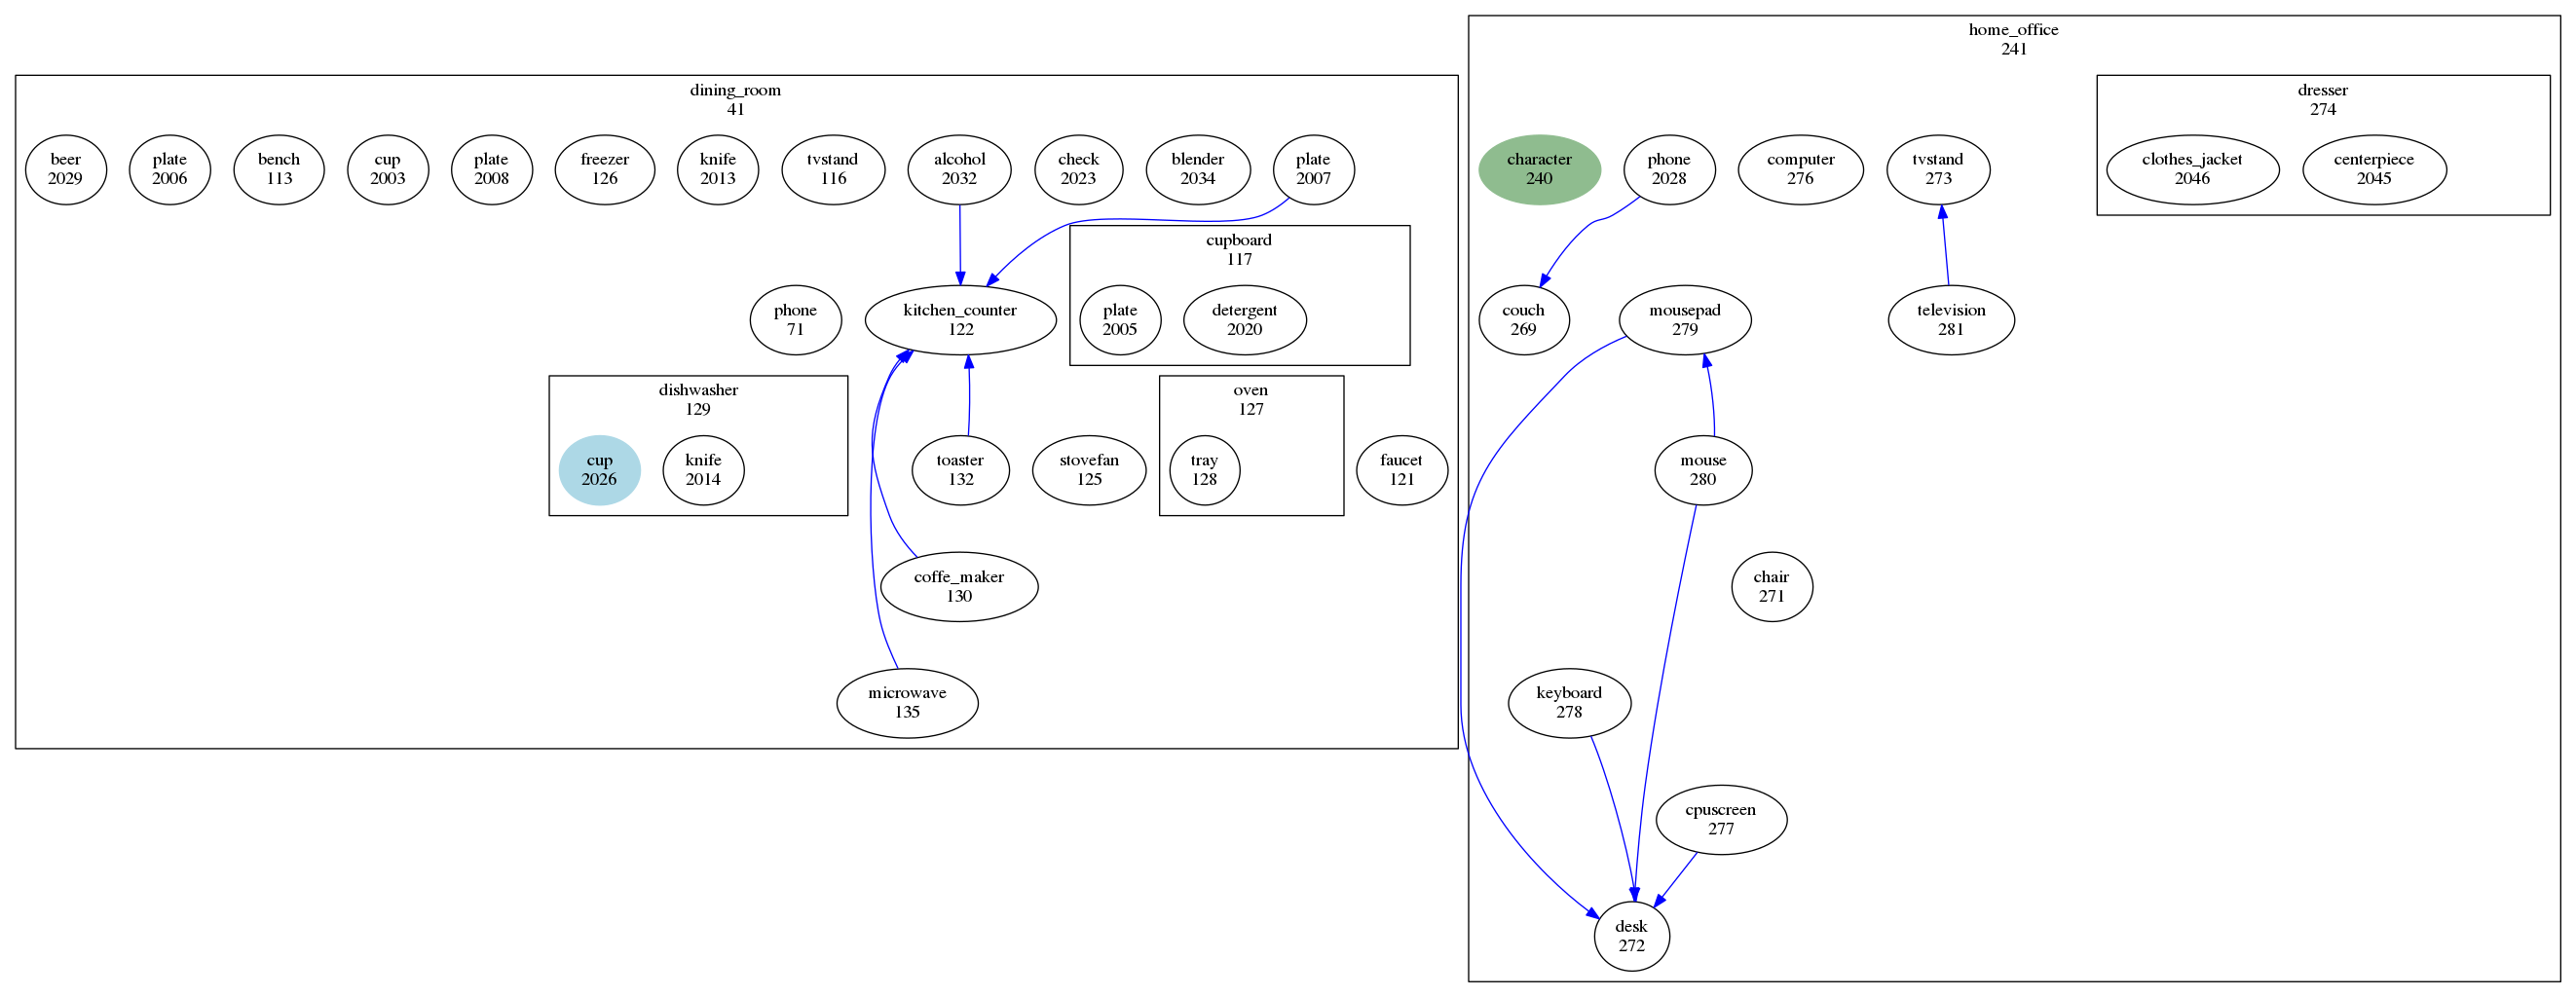

In [37]:
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize Belief

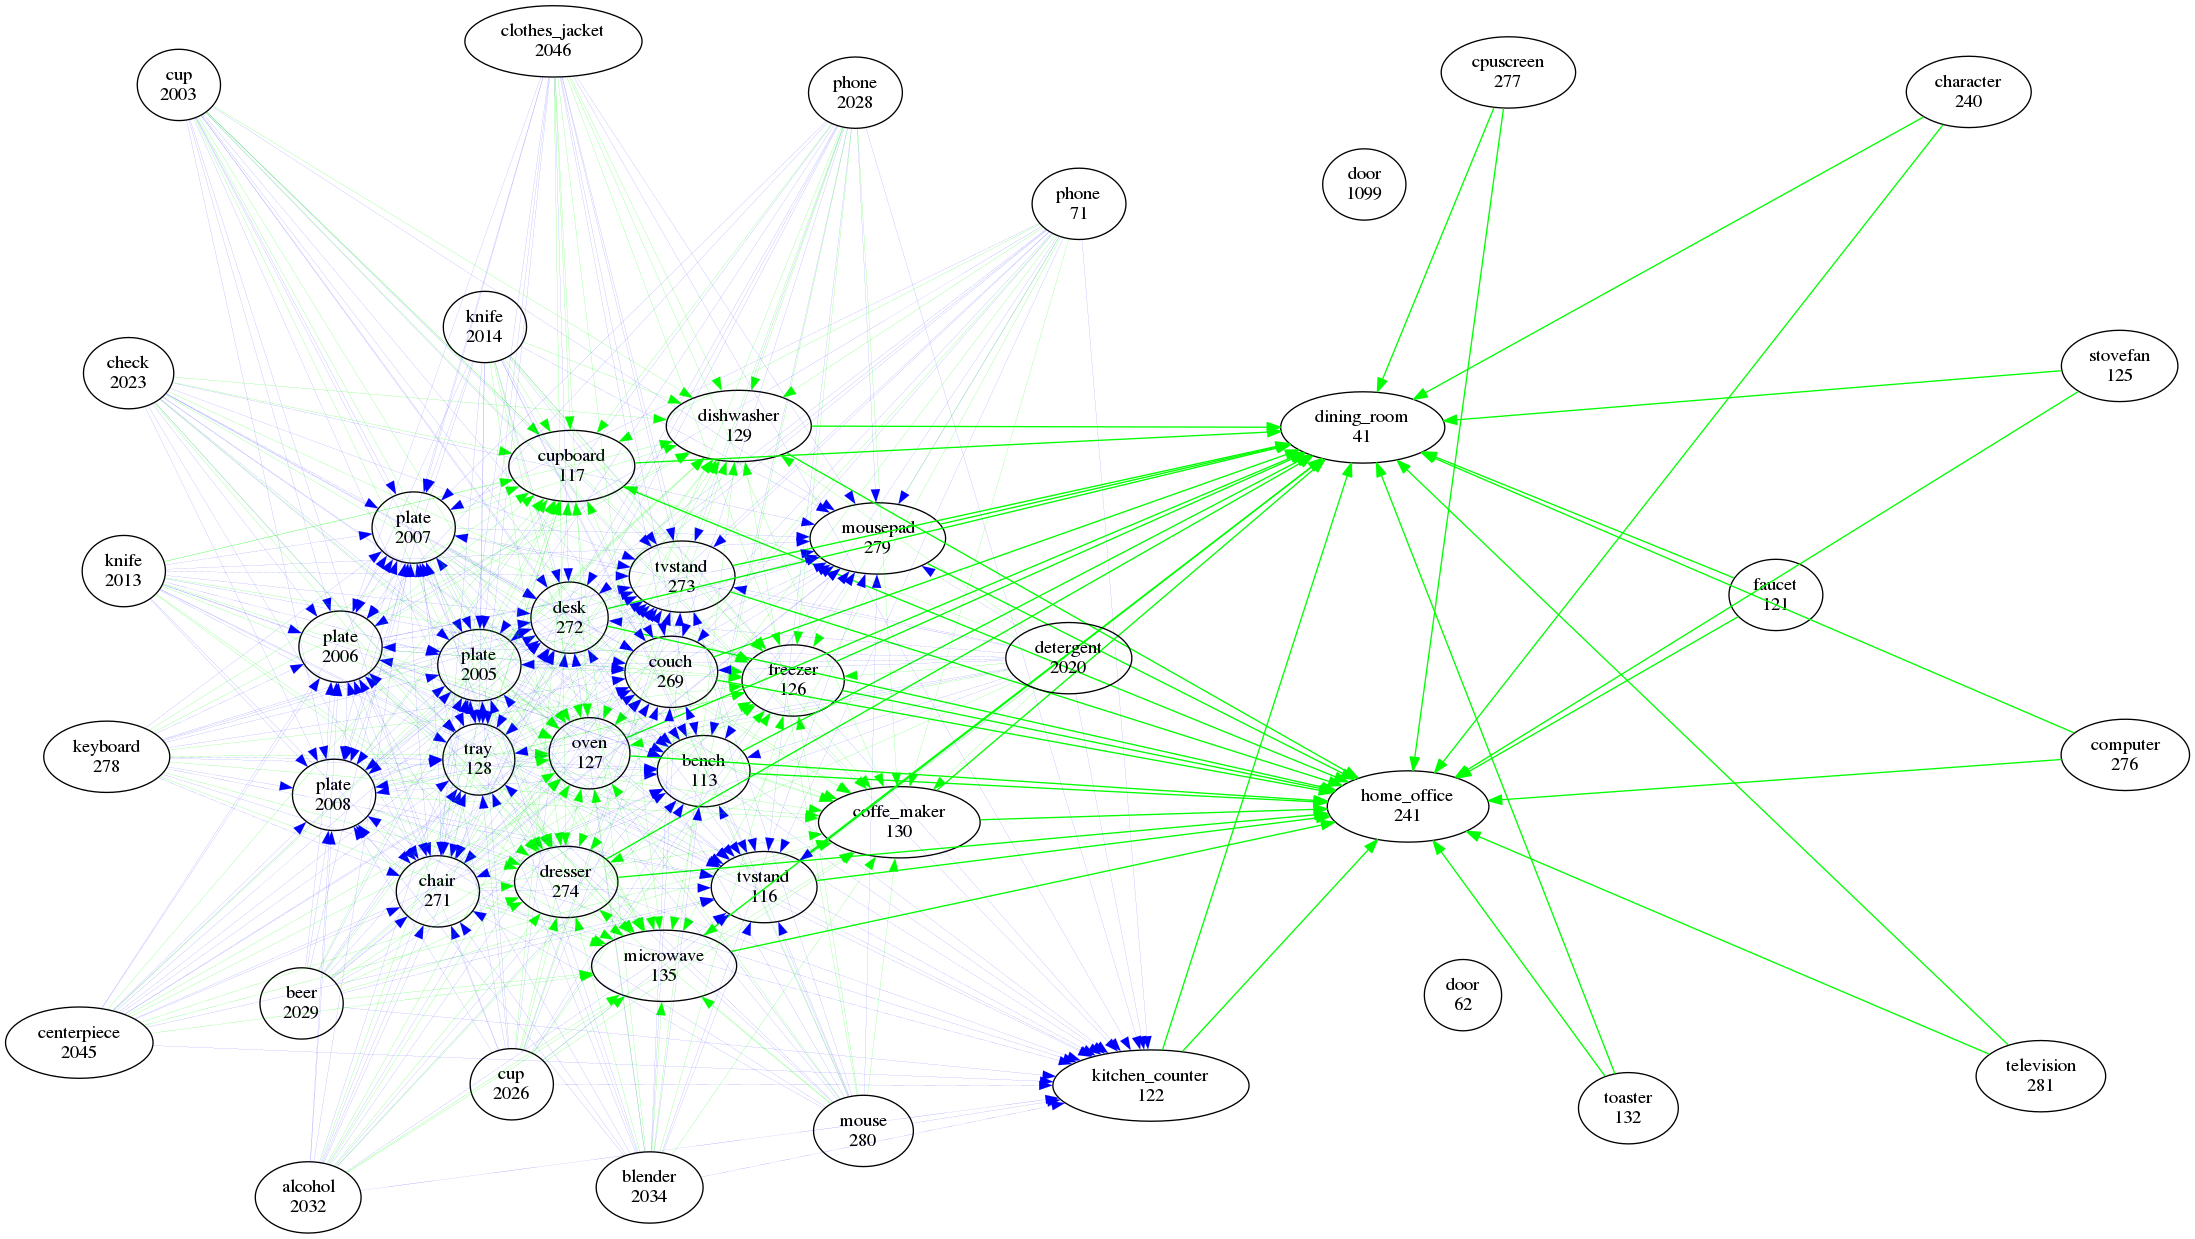

In [38]:
bel = belief.Belief(gt_state)
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Visualize sampled belief

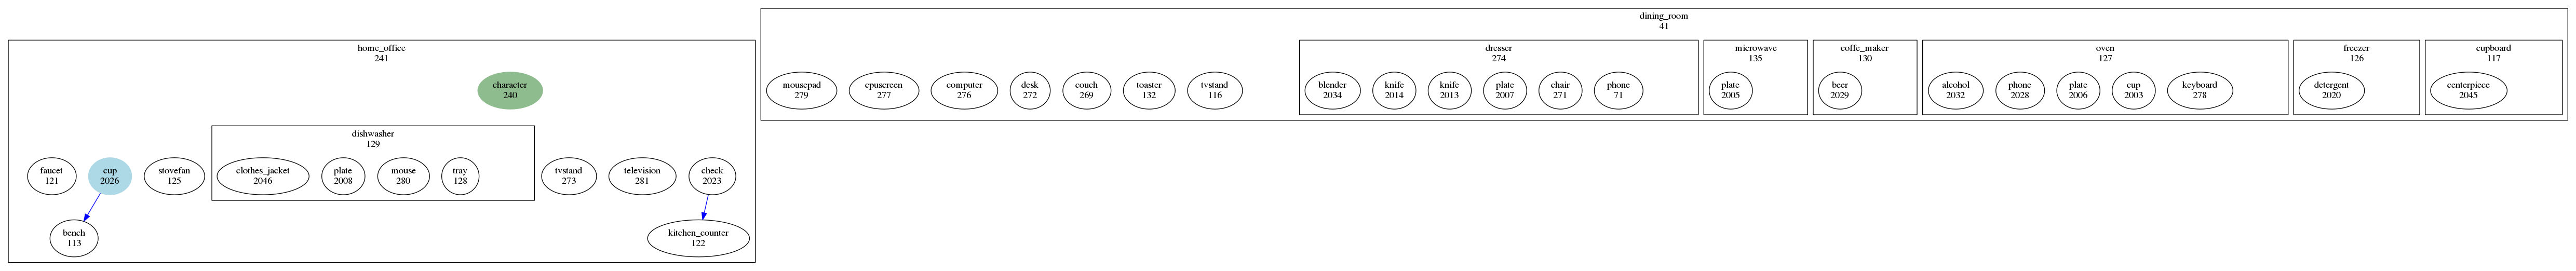

In [39]:

new_graph = bel.sample_from_belief()
graph = utils_viz.graph2im(new_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))


## Test belief update

CLOSE_CHAR
CLOSE_CHAR
CLOSE_CHAR


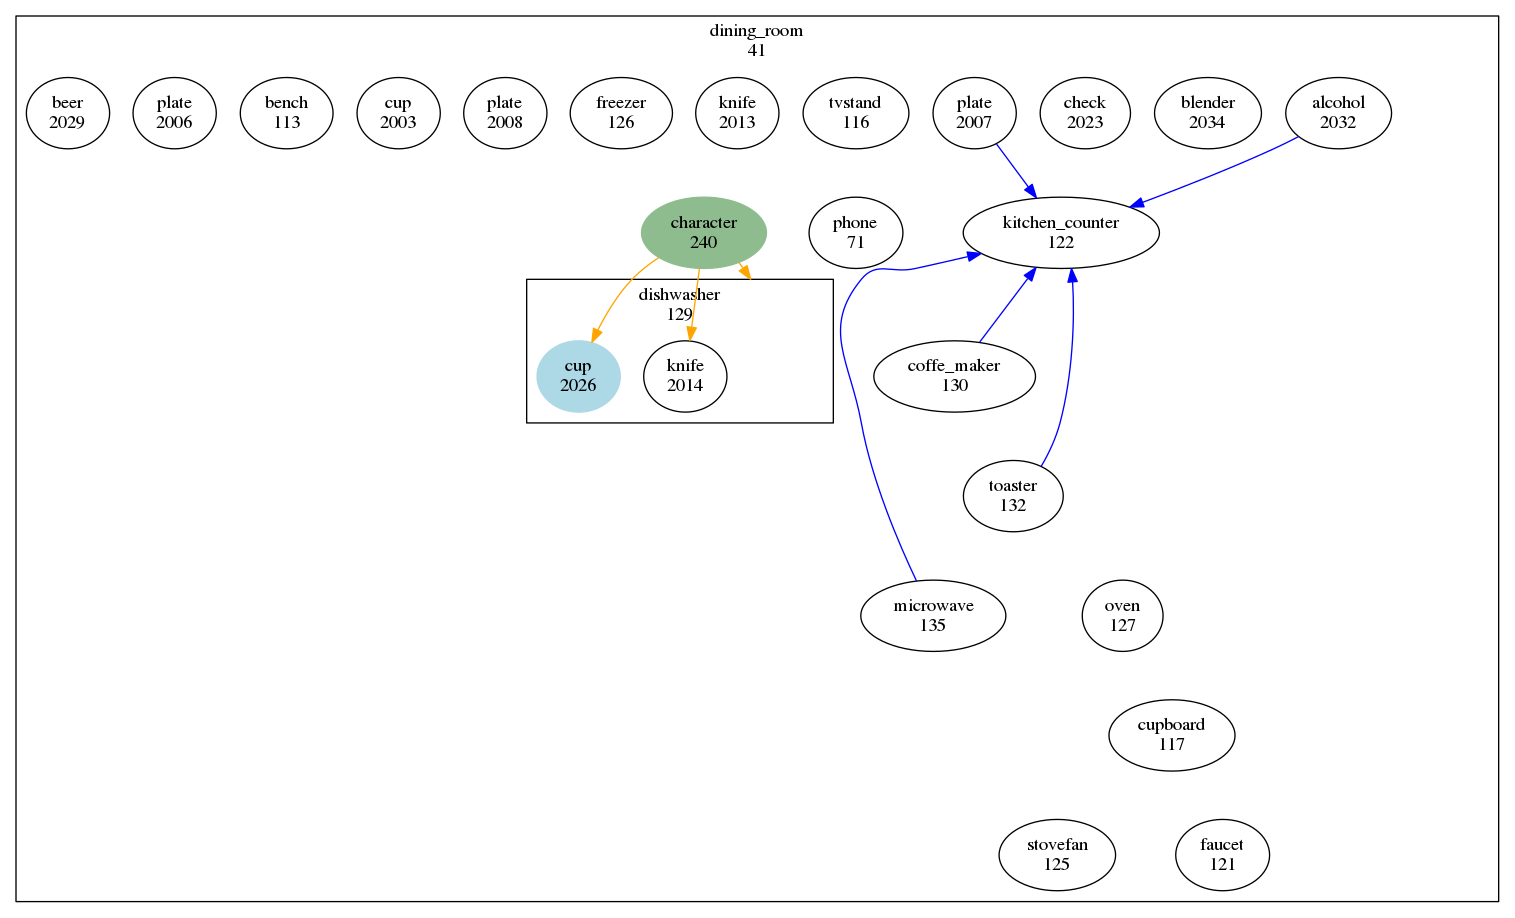

In [40]:
# Check PODMP graph
curr_env.step({0: '[walk] <dining_room> (41)'})
curr_env.step({0: '[walk] <dishwasher> (129)'})
curr_env.step({0: '[open] <dishwasher> (129)'})
obs_graph = curr_env.get_observations(0)
# graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
# graph.format = 'png'
# tmp = graph.view()
# display(Image(tmp))

graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [41]:
bel.update_from_gt_graph(obs_graph)

['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'CLOSED']
['CLOSED']
['CLOSED']
['OFF', 'CLOSED']
['OFF', 'CLOSED']
['OFF']
['OFF', 'C

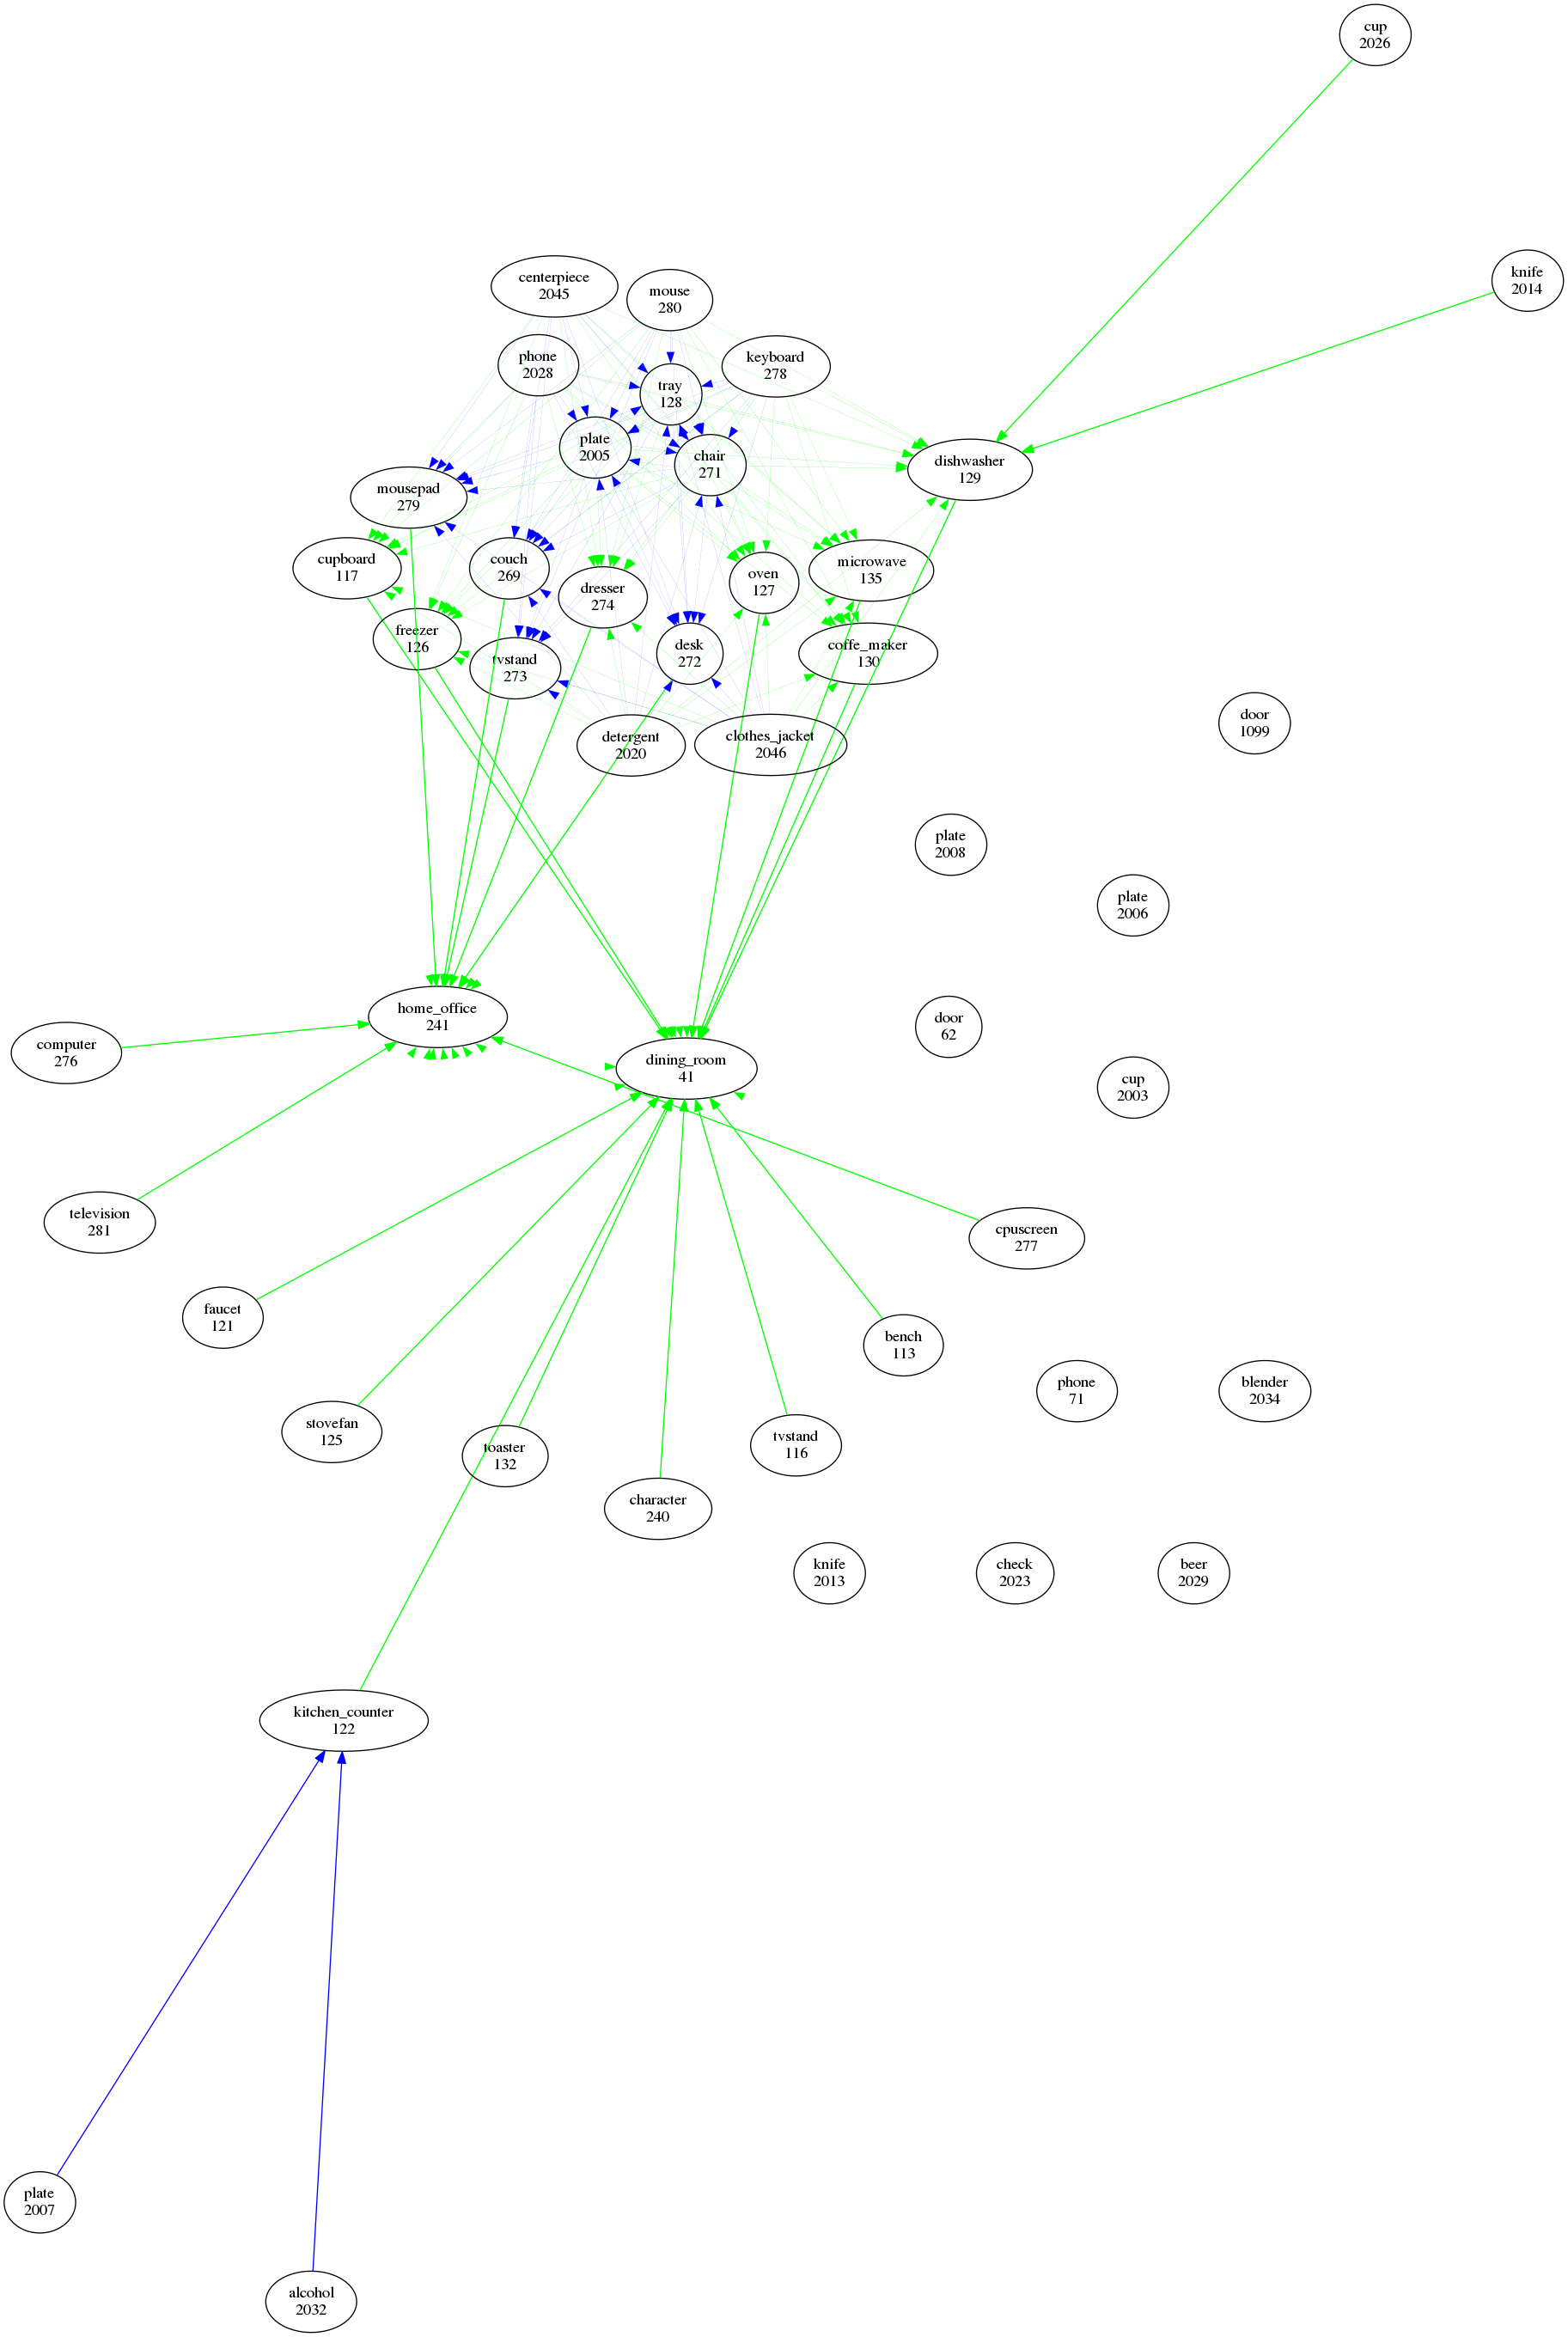

In [42]:
graph = utils_viz.belief2im(bel, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### New sampled graph

In [51]:

new_graph = bel.sample_from_belief()
#graph = utils_viz.graph2im(new_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))